## Adult Dataset Part 1: Cleaning and Preparation

#### Objectives:
1. Preprocess the data and store the cleaned dataset as adult_clean.csv
2. Load clean dataset and test supervised/unsupervised models
    - Goal: Determine best model to predict if new entry earns >50k or <50k with supervised learning
    - Goal: Find insights and patterns in data using unspuervised learning
3. Apply k-folds cross validation
    - Goal: Evaluate robustness of results across different models.
    - Goal: Use and justify different error metrics


#### Summary of dataset

Datasource: https://archive.ics.uci.edu/ml/datasets/adult

Feature descrptions copied below from the UCI website:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: Continuous. A weighting assigned from the sampling process.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous.
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- target: >50K, <=50K.

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
#original data does not come with headers. add headers based on the documentation descrption
headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'target']

In [142]:
data = pd.read_csv('./data/adult.data', names = headers)
df = data.copy()

In [143]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


On first look, it appears there are no missing values. **However the dataset descrption indicates that missing values have been flled with '?'.** Figure out what to do here :)

In [145]:
df.isin([' ?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

Text(0.5, 0.98, 'Categorical value distribution')

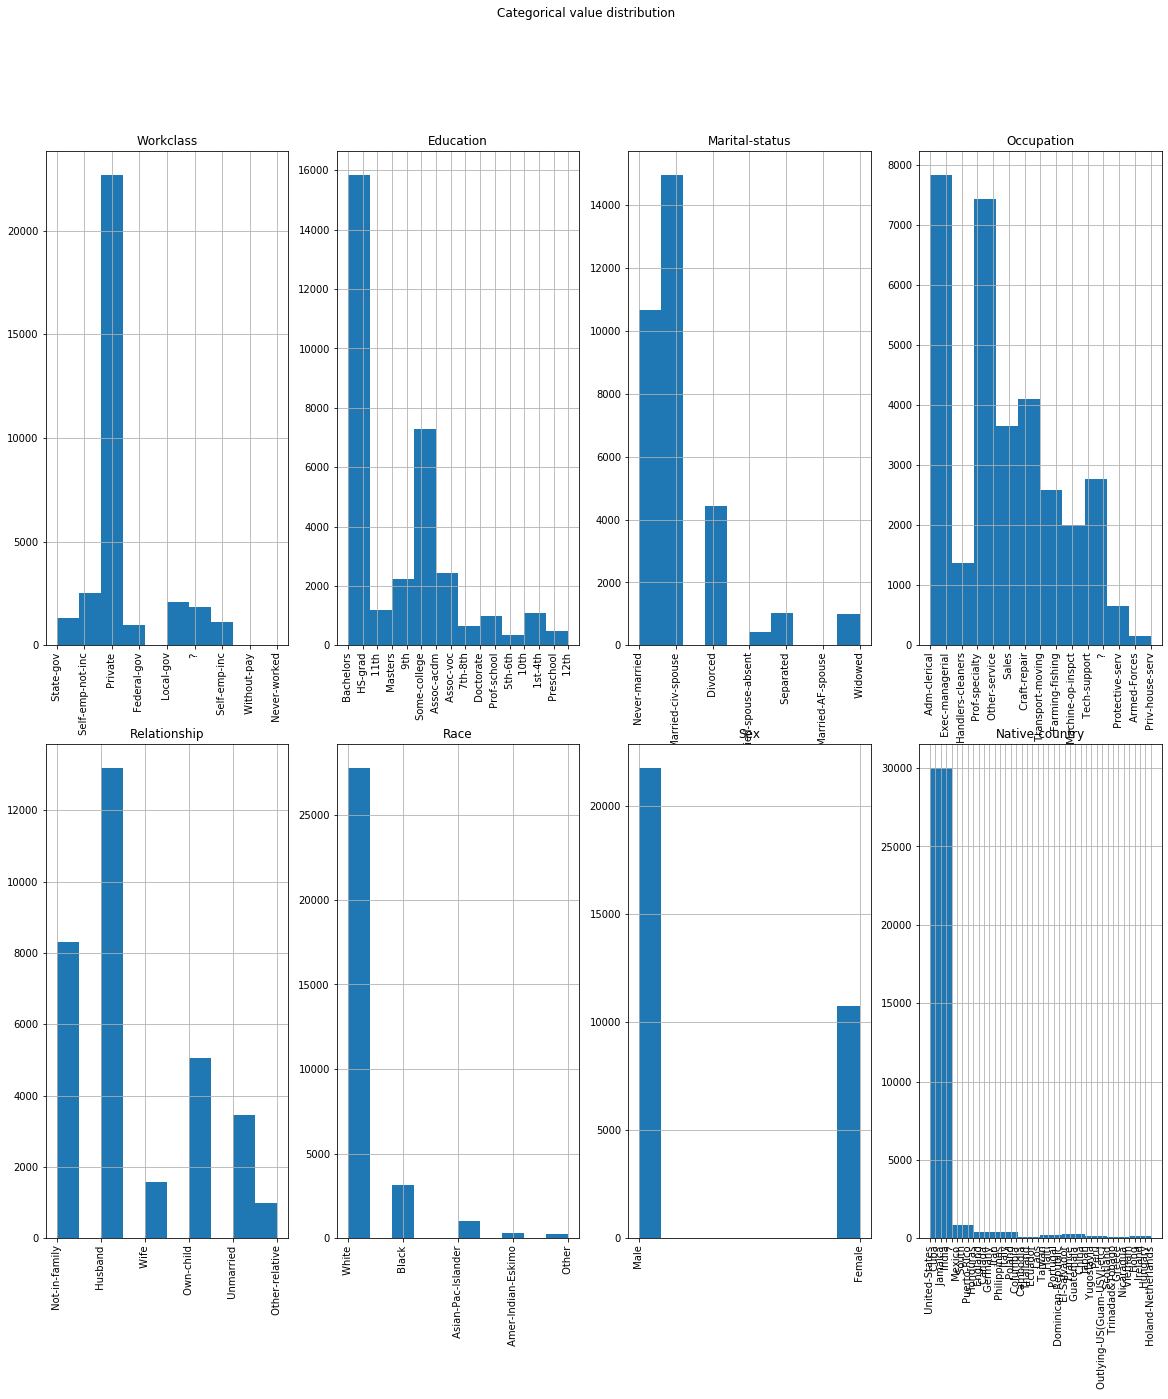

In [146]:
#plot the categroical columns to see what we are dealing with

fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(20,20))
df['workclass'].hist(ax=axes[0,0], xrot=90)
df['education'].hist(ax=axes[0,1], xrot=90)
df['marital-status'].hist(ax=axes[0,2], xrot=90)
df['occupation'].hist(ax=axes[0,3], xrot=90)
df['relationship'].hist(ax=axes[1,0], xrot=90)
df['race'].hist(ax=axes[1,1], xrot=90)
df['sex'].hist(ax=axes[1,2], xrot=90)
df['native-country'].hist(ax=axes[1,3], xrot=90)
axes[0,0].set_title('Workclass')
axes[0,1].set_title('Education')
axes[0,2].set_title('Marital-status')
axes[0,3].set_title('Occupation')
axes[1,0].set_title('Relationship')
axes[1,1].set_title('Race')
axes[1,2].set_title('Sex')
axes[1,3].set_title('Native-country')
fig.suptitle('Categorical value distribution')

Text(0.5, 0.98, 'Numerical value distribution')

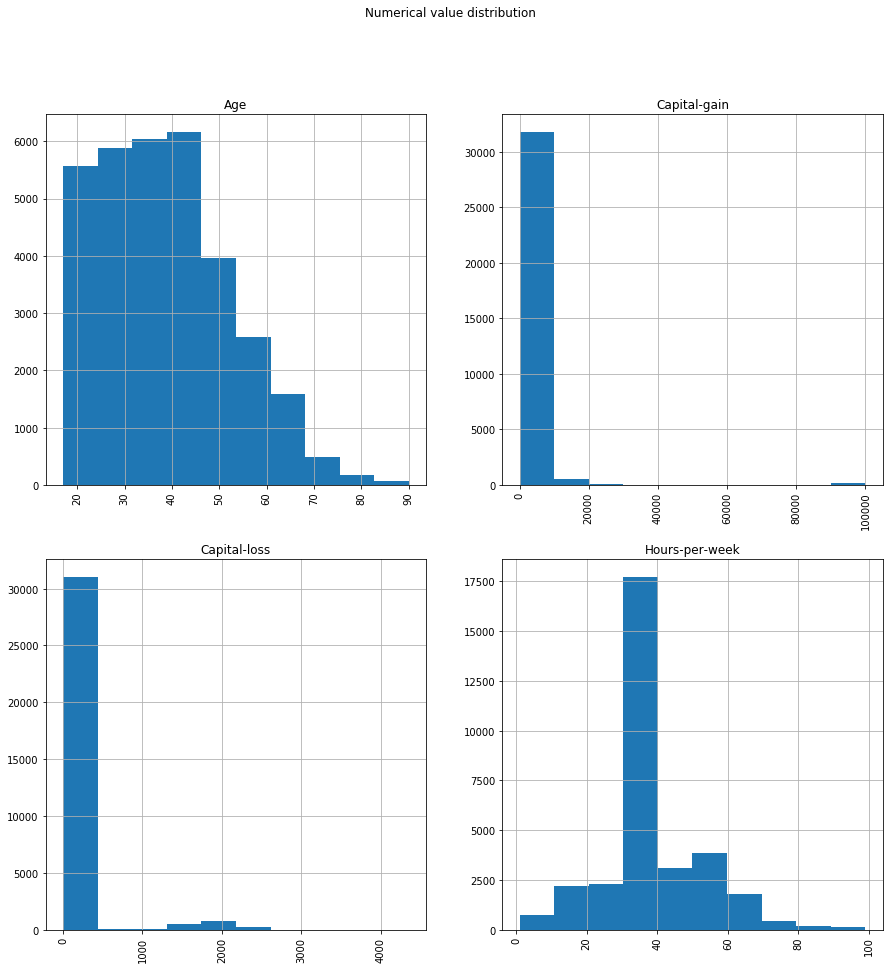

In [147]:
#plot the numerical columns

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(15,15))
df['age'].hist(ax=axes[0,0], xrot=90)
df['capital-gain'].hist(ax=axes[0,1], xrot=90)
df['capital-loss'].hist(ax=axes[1,0], xrot=90)
df['hours-per-week'].hist(ax=axes[1,1], xrot=90)
axes[0,0].set_title('Age')
axes[0,1].set_title('Capital-gain')
axes[1,0].set_title('Capital-loss')
axes[1,1].set_title('Hours-per-week')
fig.suptitle('Numerical value distribution')

Before deciding **how to deal with the missing values want to know how they influence the data**. For example, if workclass and occupation for example both have missing values (in the same tuple) it would be reasonable to drop the data.

In [148]:
#code


df['workclass'] = df['workclass'].replace({' ?': np.nan})
df['occupation'] = df['occupation'].replace({' ?': np.nan})
df['native-country'] = df['native-country'].replace({' ?': np.nan})

print(df.isin([np.NaN]).sum(axis=0))

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64


In [149]:
#code
percent_missing = df.isnull().sum() * 100 / len(df)
print(f'Total percent of missing value in the dataframe: {percent_missing.sum().round(2)}%')

print(f'Total number of rows in the dataframe: {df.shape[0]}')

nan_row = df.shape[0] - df.dropna().shape[0]
print(f'Total number of rows with nan value: {nan_row}')
print(f'Percent of row with nan value: {round((nan_row / df.shape[0] * 100), 2)}%')

nan_workclass_occupation = df.loc[(df['workclass'].isna()) & (df['occupation'].isna())]
nan_workclass_ncountry = df.loc[(df['workclass'].isna()) & (df['native-country'].isna())]
nan_occupation_ncountry = df.loc[(df['occupation'].isna()) & (df['native-country'].isna())]

print(f'Number of rows with nan in both workclass and occupation: {len(nan_workclass_occupation)}')
print(f'Number of rows with nan in both workclass and native-country: {len(nan_workclass_ncountry)}')
print(f'Number of rows with nan in both occupation and native-country: {len(nan_occupation_ncountry)}')


Total percent of missing value in the dataframe: 13.09%
Total number of rows in the dataframe: 32561
Total number of rows with nan value: 2399
Percent of row with nan value: 7.37%
Number of rows with nan in both workclass and occupation: 1836
Number of rows with nan in both workclass and native-country: 27
Number of rows with nan in both occupation and native-country: 27


**What % of the dataset do nans represent?** What is the **best approach** for dealing with the nan's?

Since the row with NaNs are a little more than 7% of the datasets, I think we can drop them without paying a high cost in terms of data loss

#### Additional Steps:
1. Apply statistical tests to determine if dropping values changes the structure of the distribution in the workplace, occupation, and native-country categories i.e. t-test for differnce of modes. 
2. Compare filling the workplace and occupation columns with mode values and applying same statistical tests.

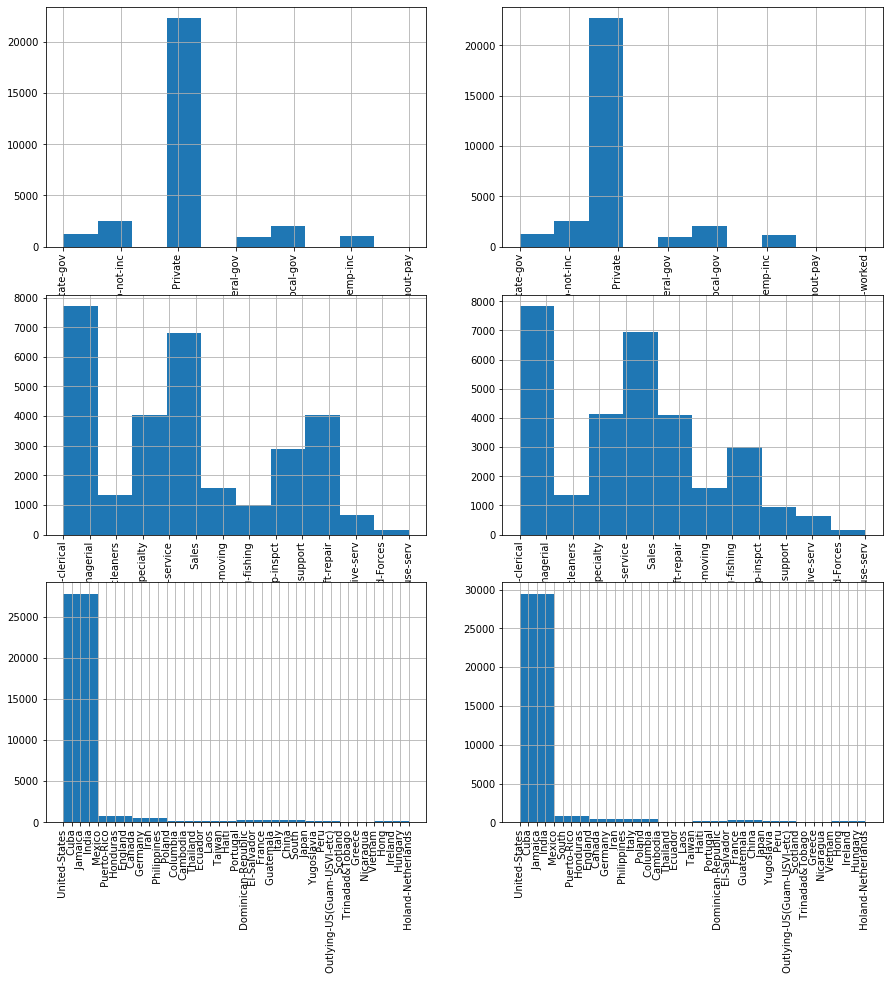

In [158]:
# test with dropped nans

df_dropped = df.dropna()

fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(15,15))
df_dropped['workclass'].hist(ax=axes[0,0], xrot=90)
df['workclass'].hist(ax=axes[0,1], xrot=90)
df_dropped['occupation'].hist(ax=axes[1, 0], xrot=90)
df['occupation'].hist(ax=axes[1, 1], xrot=90)
df_dropped['native-country'].hist(ax=axes[2, 0], xrot=90)
df['native-country'].hist(ax=axes[2, 1], xrot=90)

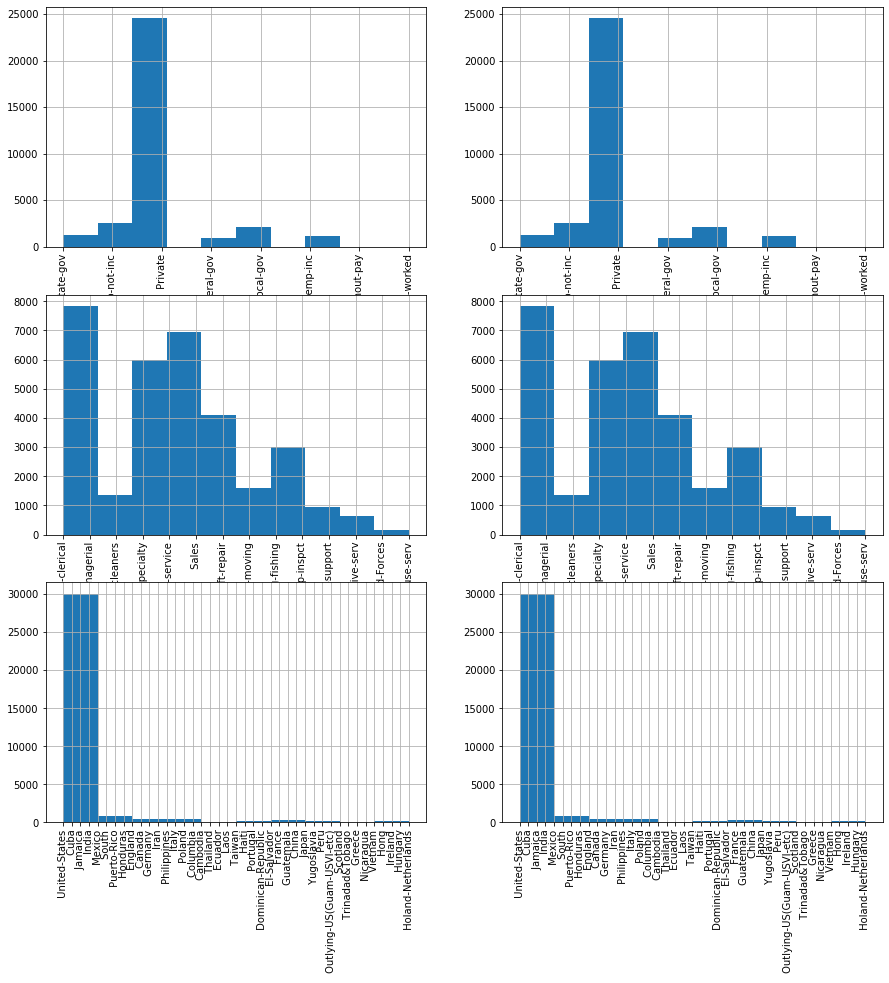

In [162]:
# test with nan filled by mode

df_filled = df
df_filled['workclass'] = df_filled['workclass'].fillna(df_filled['workclass'].mode()[0])
df_filled['occupation'] = df_filled['occupation'].fillna(df_filled['occupation'].mode()[0])
df_filled['native-country'] = df_filled['native-country'].fillna(df_filled['native-country'].mode()[0])

fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(15,15))
df_filled['workclass'].hist(ax=axes[0,0], xrot=90)
df['workclass'].hist(ax=axes[0,1], xrot=90)
df_filled['occupation'].hist(ax=axes[1, 0], xrot=90)
df['occupation'].hist(ax=axes[1, 1], xrot=90)
df_filled['native-country'].hist(ax=axes[2, 0], xrot=90)
df['native-country'].hist(ax=axes[2, 1], xrot=90)

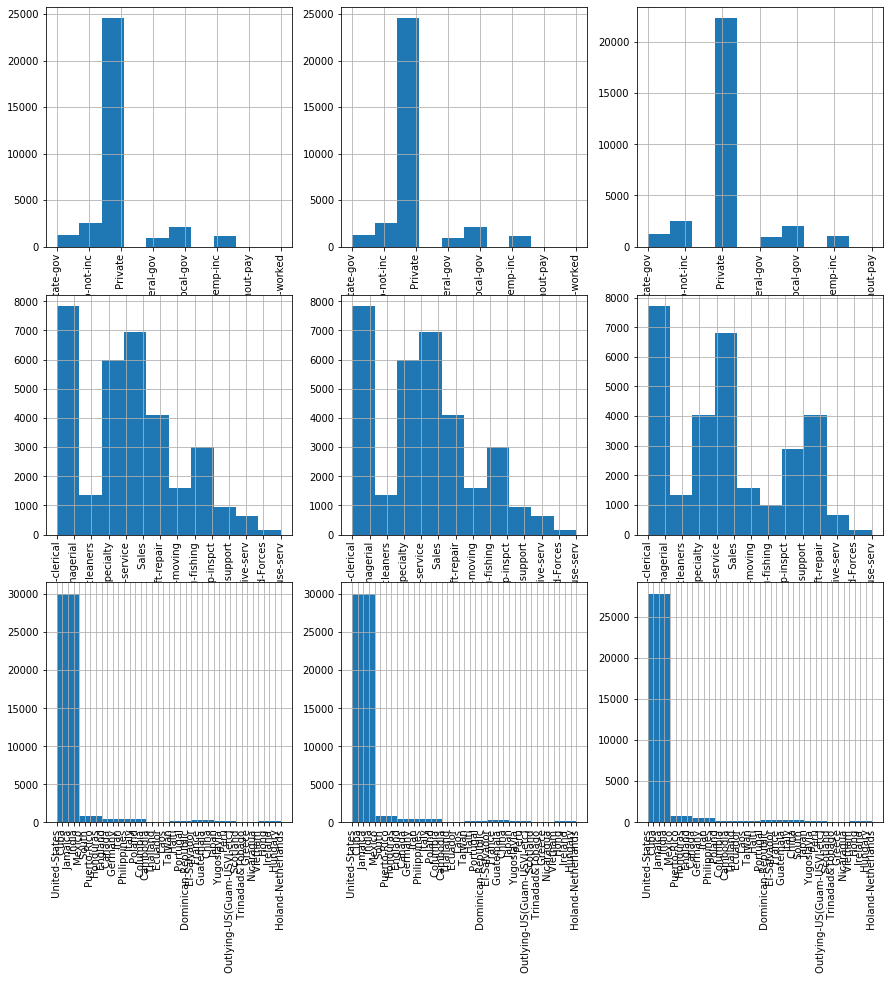

In [164]:
# comparing the distribution of origiinal data, filled by the mode and dropped

fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(15,15))
df['workclass'].hist(ax=axes[0,0], xrot=90)
df_filled['workclass'].hist(ax=axes[0,1], xrot=90)
df_dropped['workclass'].hist(ax=axes[0,2], xrot=90)
df['occupation'].hist(ax=axes[1, 0], xrot=90)
df_filled['occupation'].hist(ax=axes[1, 1], xrot=90)
df_dropped['occupation'].hist(ax=axes[1, 2], xrot=90)
df['native-country'].hist(ax=axes[2, 0], xrot=90)
df_filled['native-country'].hist(ax=axes[2, 1], xrot=90)
df_dropped['native-country'].hist(ax=axes[2, 2], xrot=90)

In [150]:
#train / test... you know the drill

# Discussion of results